<a href="https://colab.research.google.com/github/ekramasif/basic_ML/blob/main/BERT_tf_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip3 install --quiet tensorflow
!pip3 install --quiet tensorflow_text

In [52]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import seaborn as sns
from sklearn.metrics import pairwise

In [53]:
# preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
# encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [54]:
#@title Configure the model { run: "auto" }
BERT_MODEL = "https://tfhub.dev/google/experts/bert/wiki_books/mnli/2" # @param {type: "string"} ["https://tfhub.dev/google/experts/bert/wiki_books/2", "https://tfhub.dev/google/experts/bert/wiki_books/mnli/2", "https://tfhub.dev/google/experts/bert/wiki_books/qnli/2", "https://tfhub.dev/google/experts/bert/wiki_books/qqp/2", "https://tfhub.dev/google/experts/bert/wiki_books/squad2/2", "https://tfhub.dev/google/experts/bert/wiki_books/sst2/2",  "https://tfhub.dev/google/experts/bert/pubmed/2", "https://tfhub.dev/google/experts/bert/pubmed/squad2/2"]
# Preprocessing must match the model, but all the above use the same.
PREPROCESS_MODEL = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [55]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [56]:
sentences = ['এই মাত্র পাওয়া সংবাদে জানা গেলো দেশ এর করোনা পরিস্থিতির উন্নতি হয়েছে', 
            'আমাদের সমাজে মুখোশধারী মানুষের অভাব নাই', 
            'আমরা দিন দিন বোকার রাজ্যে নির্বাসিত হচ্ছি']

In [57]:
preprocess = hub.load(PREPROCESS_MODEL)
bert = hub.load(BERT_MODEL)
inputs = preprocess(sentences)
outputs = bert(inputs)

In [58]:
# print("Sentences:")
# print(sentences)

# print("\nBERT inputs:")
# print(inputs)

print("\nPooled embeddings:")
print(outputs["pooled_output"])

# print("\nPer token embeddings:")
# print(outputs["sequence_output"])


Pooled embeddings:
tf.Tensor(
[[ 0.6838703   0.7320045   0.33644506 ...  0.65714705 -0.06843525
  -0.88199085]
 [-0.13711989  0.14530677  0.15871009 ... -0.29811853 -0.8014517
  -0.3610514 ]
 [-0.17403886  0.5108166  -0.5050837  ... -0.69901764 -0.96758246
   0.13168097]], shape=(3, 768), dtype=float32)


In [59]:
from __future__ import unicode_literals
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2509 missing from current font.
  font.set_text(s

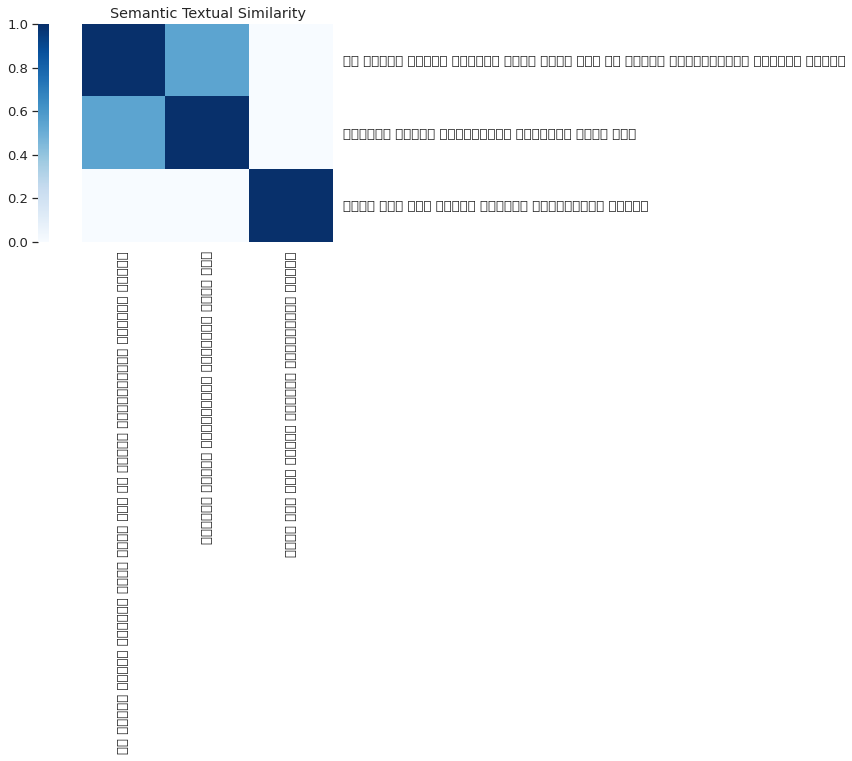

In [60]:


def plot_similarity(features, labels):
  """Plot a similarity matrix of the embeddings."""
  cos_sim = pairwise.cosine_similarity(features)
  sns.set(font_scale=1.2)
  cbar_kws=dict(use_gridspec=False, location="left")
  g = sns.heatmap(
      cos_sim, xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, cmap="Blues", cbar_kws=cbar_kws)
  g.tick_params(labelright=True, labelleft=False)
  g.set_yticklabels(labels, rotation=0)
  g.set_title("Semantic Textual Similarity")
plot_similarity(outputs["pooled_output"], sentences)